In [90]:
#import
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [91]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jahan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
sms_dataset = pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None, names=['label', 'content'])
sms_dataset.shape

(5572, 2)

In [93]:
sms_dataset.head()

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
sms_dataset.isnull().sum()

label      0
content    0
dtype: int64

In [95]:
# separating the data & label
X = sms_dataset['content']
Y = sms_dataset['label']
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: content, Length: 5572, dtype: object
0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object


In [96]:
#count in each content, how many symbols are there

SPECIALSYMBOLS =set("@$%&*#^~+=")

def styling(content):
    #for letters only 
    letters = [c for c in content if c.isalpha()]
    upper_ratio = sum(1 for c in letters if c.isupper())/len(letters) if letters else 0
    #counts :
    exclamation_count = content.count("!")
    question_count = content.count("?")
    #special signs 
    special_sign = sum(c in SPECIALSYMBOLS for c in content)
    #URL count 
    url_count = len(re.findall(r"http://", content))

    return pd.Series({
        "upper ratio": upper_ratio,
        "exclamation count": exclamation_count ,
        "question count": question_count,
        "special count": special_sign,
        "url count": url_count
    })

In [97]:
port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [98]:
styling_features = sms_dataset['content'].apply(styling)
sms_dataset = pd.concat([sms_dataset, styling_features], axis = 1)

In [99]:
sms_dataset['content'] = sms_dataset['content'].apply(stemming)

print(sms_dataset['content'])

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: content, Length: 5572, dtype: object


In [100]:
sms_dataset['label'] = sms_dataset['label'].str.strip().str.lower()
print(sms_dataset['label'].unique())
sms_dataset['label'] = sms_dataset['label'].map({'ham': 0, 'spam': 1})
Y = sms_dataset['label'].values
print(Y)

['ham' 'spam']
[0 0 1 ... 0 0 0]


In [101]:
#convert the textual data to numerical data
X = sms_dataset['content'].values
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [102]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 45127 stored elements and shape (5572, 6296)>
  Coords	Values
  (0, 190)	0.3522946643655987
  (0, 379)	0.26350491969128115
  (0, 736)	0.33630333732147566
  (0, 738)	0.29761995607435426
  (0, 964)	0.29761995607435426
  (0, 1169)	0.27282796669086984
  (0, 2171)	0.14066343975170745
  (0, 2208)	0.1649859743034801
  (0, 2245)	0.19460776670194488
  (0, 2827)	0.3522946643655987
  (0, 2932)	0.28506031120996994
  (0, 4091)	0.24055424511726686
  (0, 5957)	0.19460776670194488
  (0, 6135)	0.23616756554565888
  (1, 2794)	0.4745440766926726
  (1, 2960)	0.4218982744467187
  (1, 3760)	0.2809319560263009
  (1, 3785)	0.564793662023427
  (1, 6056)	0.44597659211687757
  (2, 262)	0.18752116579572622
  (2, 1058)	0.2181159425903744
  (2, 1220)	0.22327647280120547
  (2, 1673)	0.3983526060107063
  (2, 1791)	0.52682621884254
  (2, 1890)	0.18841663063918468
  :	:
  (5567, 5520)	0.20199660188545587
  (5567, 5644)	0.23790345271594315
  (5568, 1704)	0.66

In [103]:
from scipy.sparse import hstack

styling_matrix = styling_features.values

#combine styling and stemming
X_comb = hstack([X, styling_matrix])

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X_comb, Y, test_size = 0.1, stratify=Y, random_state = 3)

In [105]:
model = LogisticRegression()
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [106]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data: ', training_data_accuracy)

Accuracy score of the training data:  0.9758675708017551


In [107]:
#accuracy of test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.96415770609319


In [108]:
def predict_message(msg):
    msg_clean = stemming(msg)
    msg_style = styling(msg).values.reshape(1, -1)
    msg_vector = vectorizer.transform([msg_clean])
    
    msg_comb = hstack([msg_vector, msg_style])
    
    x = model.predict(msg_comb)[0]
    
    if x == 0:
        print("This is a real message.")
    else:
        print("This is a spam.")

In [109]:
predict_message("WINNER!!! Claim your $5000 now!!!")
predict_message("Dinner for two at 6?")

This is a spam.
This is a real message.


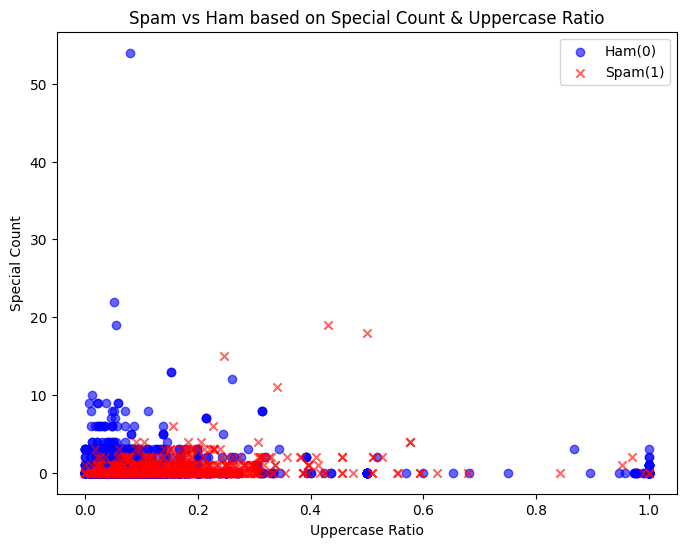

In [115]:
import matplotlib.pyplot as plt


spam = sms_dataset[sms_dataset['label'] == 1]
ham = sms_dataset[sms_dataset['label'] == 0]

plt.figure(figsize=(8,6))

plt.scatter(ham['upper ratio'], ham['special count'], color = 'blue'
            , marker='o', alpha = 0.6, label = 'Ham(0)')

plt.scatter(spam['upper ratio'], spam['special count'], color='red', marker='x',
            alpha=0.6, label = 'Spam(1)')

plt.xlabel("Uppercase Ratio")
plt.ylabel("Special Count")
plt.title("Spam vs Ham based on Special Count & Uppercase Ratio")
plt.legend()
plt.show()